<h1>PROJECT: DATA WRANGLING AND ANALYSIS </h1>

<h2>Table Of Content </h2>
<ul>
    <li>Introduction</li>
    <li><a href="#gathering">Gathering Data</a></li>
    <li>Assessing Data</li>
    <li>Cleaning Data</li>
        <ul>
            <li>Quality</li>
            <li>Tidiness</li>
        </ul>
    <li>Storing, Analyzing, and Visualizing Data</li>
</ul>

<h2> INTRODUTION </h2>



In [3]:
# Import statements for packages used in project
import numpy as np
import pandas as pd
import json
import requests
import json
import os
import re
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2>GATHER </h2>
<a id="gathering"></a>

In [4]:
# Read the twitter archive from local storage.
df_archived_data = pd.read_csv('twitter-archive-enhanced.csv')
df_archived_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_archived_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
#Download the image predictions programatically
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
df_image_predictions= pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<code>

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
</code>

# Read the .txt file line by line into a list of dictionaries
tweet_list = []
for tweet in open('tweet-json.txt', 'r'):
    tweet_data = json.loads(tweet)
    tweet_list.append({'tweet_id': tweet_data['id_str'],
                        'retweet_count': tweet_data['retweet_count'],
                        'favorite_count': tweet_data['favorite_count'],
                        'followers_count': tweet_data['user']['followers_count']})

In [8]:
# Read the .txt file line by line into a list of dictionaries
tweet_list = []
for tweet in open('tweet-json.txt', 'r'):
    tweet_data = json.loads(tweet)
    tweet_list.append({'tweet_id': tweet_data['id_str'],
                        'retweet_count': tweet_data['retweet_count'],
                        'favorite_count': tweet_data['favorite_count'],
                        'followers_count': tweet_data['user']['followers_count']})

In [9]:
# Convert the list of dictionaries to a pandas DataFrame
tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id','retweet_count',
                                                 'favorite_count', 'followers_count'])

In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


<h2> Assessing data </h2>

In [11]:
# Assess df_archive dataframe Visually
df_archived_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
# Assess df_prediction dataframe Visually
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
# Assess tweet_json dataframe Visually
tweet_json

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [14]:
#Check the df_archive information
df_archived_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The result above shows that there are 2356 entries. 6 columes have incomplete data reporting less than 2356 values.

In [15]:
#check for unique values values
(df_archived_data.tweet_id.nunique())

2356

In [16]:
df_archived_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
df_archived_data[df_archived_data['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [18]:
df_archived_data[df_archived_data['name'].apply(len)<=2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [19]:
df_archived_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
# View the source values
df_archived_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
#View the name values
df_archived_data.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
Daisy             7
an                7
Bailey            7
Buddy             7
Toby              7
Jax               6
Milo              6
Jack              6
Scout             6
Bella             6
Stanley           6
Oscar             6
Dave              6
Koda              6
Leo               6
Rusty             6
Oakley            5
               ... 
Zuzu              1
Brandy            1
Biden             1
Olaf              1
Kuyu              1
Dot               1
Kulet             1
Carper            1
Chesterson        1
Arlen             1
Philippe          1
Crimson           1
Ben               1
Blu               1
Timofy            1
Bronte            1
Tess              1
Butters           1
Sandra            1


In [22]:
#View info for df_prediction dataframe
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#Check for tweet_id unique values on the df_prediction data frame
df_image_predictions.tweet_id.nunique()

2075

In [24]:
df_image_predictions.jpg_url.nunique()

2009

In [25]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


<h2> Quality </h2><br>
<h3> df_archive table </h3>
<br>
<ul>
    <li>The source value is in HTML format. It should be in strings</li>
    <li>"None" is not a dog name, remove values with "none".</li>
    <li>Missing URLs in expanded_urls</li>
    <li>Drop rows with NA in the retweeted_status_id </li>
    <li> Change source type to Category  </li>
    <li>Erroneous datatype (tweet_id)</li>
    <li>The numerator and denominator columns have invalid values</li>
</ul>
<br>
<h3> df_prediction table </h3>
<ul>
    <li>Remove duplicate jpg_url entries</li>
    <li>Missing images</li>
    <li> Drop image number column </li>
    <li>Erroneous datatype (tweet_id)</li>
</ul>
<br>
<h3> tweet_json table </h3>
<ul>
    <li>Erroneous datatype (tweet_id)</li>
</ul>

<h2> Tidiness </h2>
<ul>
    <li> The columns on the df_prediction table should be on the archive table. </li>
    <li> The tweet_json should be merged with the archive table.</li>
    <li> The dog stages should be a column </li>

<h2> Cleaning Data </h2>

In [26]:
# Make copies of the original dataframe
df_archived_data_clean = df_archived_data.copy()
df_image_predictions_clean = df_image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [27]:
df_archived_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<h3> Define </h3>
<ul>
    <li> Drop rows with NA in the retweeted_status_id </li>
 </ul>
 <h3> Code </h3>

In [28]:
# Remove rows that have values in the retweeted_status_id column
df_archived_data_clean = df_archived_data_clean[df_archived_data_clean['retweeted_status_id'].isnull()]

In [29]:
df_archived_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

<h3> Define </h3>
<ul>
    <li> Drop columns that will not be needed for the analysis </li>
 </ul>
 <h3> Code </h3>

In [30]:
#drop columns
df_archived_data_clean = df_archived_data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis=1)  

<h3> Test </h3>

In [31]:
df_archived_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


<h3> Define </h3>
<ul>
    <li> Remove Invalid Names </li>
    
    source: https://stackoverflow.com/questions/50599934/removing-rows-from-dataframe-whose-first-letter-is-in-lowercase
    
</ul>
<h3> Code </h3>

In [32]:
#df_archived_data_clean = df_archived_data_clean[df_archived_data_clean.name != 'None']
#df_archived_data_clean['name'][df_archived_data_clean['name'].str.match(r'[a-z]+')] = 'None']

In [33]:
df_archived_data_clean.name = df_archived_data_clean.name.replace(r'^[a-z]+', np.nan, regex=True)

In [34]:
df_archived_data_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22           NaN
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
30          None
          ...   
2326         NaN
2327         NaN
2328        None
2329        None
2330        None
2331        None
2332        None
2333         NaN
2334         NaN
2335         NaN
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351        None
2352         NaN
2353         N

<h3> Test </h3>

In [35]:
df_archived_data_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
1954          Albert
875           Albert
412            Albus
144            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
1616           Alfie
367            Alfie
858            Alfie
51              Alfy
1701           Alice
201            Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
2191             NaN
2198             NaN
2204             NaN
2211             NaN
2212             NaN
2218             NaN
2222             NaN
2235             NaN
2249             NaN
2255             NaN
2264             NaN
2273             NaN
2287             NaN
2304             NaN
2311             NaN
2314             NaN
2326         

<h3> Define </h3>
<ul>
    <li> Extract Source As String </li>
</ul>
<h3> Code </h3>

In [36]:
df_archived_data_clean.source = df_archived_data_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

df_archived_data_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
30      Twitter for iPhone
               ...        
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2331    Twitter for iPhone
2

<h3> Test </h3>

In [37]:
df_archived_data_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

<h3> Define </h3>
<ul>
    <li>Remove duplicate url </li>
</ul>

<h3> Code </h3>

In [38]:
df_image_predictions_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

<h3> Test </h3>

In [39]:
df_image_predictions_clean.jpg_url.duplicated().sum()

0

<h3> Define </h3>
<ul>
    <li>Drop img_num column</li>
</ul>

<h3> Code </h3>

In [40]:
df_image_predictions.drop(['img_num'], axis=1, inplace=True)

<h3> Test </h3>

In [41]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [42]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [43]:
#Convert to int to enable merging
df_archived_data_clean.tweet_id = df_archived_data_clean.tweet_id.astype("str")
df_image_predictions.tweet_id = df_image_predictions.tweet_id.astype('str')
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype('str')

In [44]:
#Fix rating numerator and denominator(s) that are not actually ratings. Also clean the numerators with decimals.

df_archived_data_clean


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


In [45]:
# View all occurences where there are more than one #/# in 'text' column

text_ratings_to_fix = df_archived_data_clean[df_archived_data_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


55      @roushfenway These are good dogs but 17/10 is ...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
766     "Yep... just as I suspected. You're not flossi...
1007    This is Bookstore and Seaweed. Bookstore is ti...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1359    This is Socks. That water pup w the super legs...
1459    This may be the greatest video I've ever been ...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1508    When bae says they can't go out but you see th...
1525    This is Eriq. His friend just reminded him of ...
1538    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1662    This is Darrel. He just robbed a 7/11 and is i...
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1832    These two pups just met and have instantly bon...
1897    Meet R

In [46]:
for entry in text_ratings_to_fix:
    mask = df_archived_data_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_archived_data_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_archived_data_clean.loc[mask, column_name2] = 10

In [73]:
df_archived_data_clean[df_archived_data_clean.text.isin(text_ratings_to_fix)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,dog_stages
555,777684233540206592,2016-09-19 01:42:24 +0000,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",11,10,None,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,cocker_spaniel,0.253442,...,golden_retriever,0.162850,True,otterhound,0.110921,True,3403,12518,3200902,None
749,747600769478692864,2016-06-28 01:21:27 +0000,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,7,10,Bookstore,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,Chesapeake_Bay_retriever,0.804363,...,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,619,2545,3200943,None
800,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",14,10,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,...,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,9220,20648,3200943,None
891,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,13,10,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,...,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,1764,4493,3200945,None
925,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,11,10,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,...,malamute,0.317053,True,Eskimo_dog,0.273419,True,247,2574,3200945,None
941,714258258790387713,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,8,10,Travis,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,collie,0.176758,...,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,808,3281,3200947,None
1062,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,2,10,Socks,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,...,collie,0.097364,True,English_springer,0.003037,True,429,2085,3200949,None
1152,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/69506...,seat_belt,0.522211,...,sunglasses,0.077552,False,ice_lolly,0.051774,False,685,1771,3200950,None
1157,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,5,10,Oliviér,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,Australian_terrier,0.407886,...,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True,700,2244,3200950,None
1192,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,10,10,None,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.886232,...,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,656,2608,3200950,None


In [74]:
# View tweets with decimals in rating in 'text' column
df_archived_data_clean[df_archived_data_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,dog_stages
39,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,...,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,10407,46860,3200890,None
503,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,...,Persian_cat,0.122978,False,chow,0.102654,True,7069,20296,3200901,None
553,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,...,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1885,7320,3200810,pupper
1374,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,26,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,...,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,542,1879,3200953,None


In [76]:
# Set correct numerators for specific tweets
df_archived_data_clean.loc[(df_archived_data_clean['tweet_id'] == 883482846933004288) & (df_archived_data_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_archived_data_clean.loc[(df_archived_data_clean['tweet_id'] == 786709082849828864) & (df_archived_data_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_archived_data_clean.loc[(df_archived_data_clean['tweet_id'] == 778027034220126208) & (df_archived_data_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_archived_data_clean.loc[(df_archived_data_clean['tweet_id'] == 680494726643068929) & (df_archived_data_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#### TEST

In [78]:
df_archived_data_clean['source'].value_counts()

Twitter for iPhone    1861
Twitter Web Client      25
TweetDeck               10
Name: source, dtype: int64

<br>

<h2> TIDINESS </h2>
<h3> Define </h3>
<ul>
    <li> Merge the tables together </li>
</ul>
<h3>Code</h3>

In [47]:
#merge the two tables
df_archived_data_clean = pd.merge(left=df_archived_data_clean, right=df_image_predictions, how='inner', on='tweet_id')

In [48]:
df_archived_data_clean = pd.merge(left=df_archived_data_clean, right=tweet_json_clean, how='inner', on='tweet_id')

<h3> Test </h3>

In [49]:
df_archived_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null int64
name                  1896 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null

<h3> Define </h3>
<ul>
    <li>Change tweet_id to type Object </li>
</ul>

<h3> Code </h3>

In [50]:
df_archived_data_clean.tweet_id = df_archived_data_clean.tweet_id.astype('object')

<h3> Test </h3>

In [51]:
df_archived_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null int64
name                  1896 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null

<h3> Define </h3>
<ul>
    <li>Drop rows with NA </li>
</ul>

<h3> Code </h3>

In [52]:
df_archived_data_clean.dropna(inplace=True)

<h3> Test </h3>

In [53]:
df_archived_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1896 non-null object
timestamp             1896 non-null object
source                1896 non-null object
text                  1896 non-null object
rating_numerator      1896 non-null object
rating_denominator    1896 non-null int64
name                  1896 non-null object
doggo                 1896 non-null object
floofer               1896 non-null object
pupper                1896 non-null object
puppo                 1896 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null bool
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null bool
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null

In [54]:
(df_archived_data_clean['doggo'] + df_archived_data_clean['floofer'] + df_archived_data_clean['pupper'] + df_archived_data_clean['puppo']).value_counts()

NoneNoneNoneNone        1602
NoneNonepupperNone       194
doggoNoneNoneNone         61
NoneNoneNonepuppo         22
doggoNonepupperNone        8
NoneflooferNoneNone        7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
dtype: int64

<h3> Define </h3>
<ul>
    <li> Combine stages to make a column </li>
 </ul>
 
 Source: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
 
 <h3> Code </h3>

In [55]:
def stages (row):
   if (row['doggo'] + row['floofer'] + row['pupper'] + row['puppo']).count('None') == 2 :
      return 'Multiple'
   if row['doggo'].count('doggo') == 1 :
      return 'doggo'
   if row['floofer'].count('floofer') == 1 :
      return 'floofer'
   if row['pupper'].count('pupper') == 1:
      return 'pupper'
   if row['puppo'].count('puppo')  == 1:
      return 'puppo'
   return 'None'

In [56]:
#Create Column to merge other columns
df_archived_data_clean['dog_stages'] = df_archived_data_clean.apply(lambda row: stages(row), axis=1)

In [57]:
#drop Columns not needed
df_archived_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace= True)

<h3> Test </h3>

In [58]:
df_archived_data_clean['dog_stages'].value_counts()

None        1602
pupper       194
doggo         61
puppo         22
Multiple      10
floofer        7
Name: dog_stages, dtype: int64

<h2> Save Cleaned Data </h2>

In [59]:
df_archived_data_clean.to_csv('twitter_archive_master.csv', index=False) 

<h2> Analyzing, and Visualizing Data </h2>

In [60]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [61]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 21 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null object
source                1896 non-null object
text                  1896 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null bool
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null bool
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null bool
retweet_count         1896 non-null int64
favorite_count        1896 non-null int64
followers_count       1896 non-null int64
dog_stages            1896 non-null object

In [62]:
#twitter_archive_master.source = twitter_archive_master.source.astype("category")

> Insight 1: What is the most used twitter source

### Define

In [63]:
source = twitter_archive_master.source.value_counts(normalize=True)

In [64]:
source

Twitter for iPhone    0.981540
Twitter Web Client    0.013186
TweetDeck             0.005274
Name: source, dtype: float64

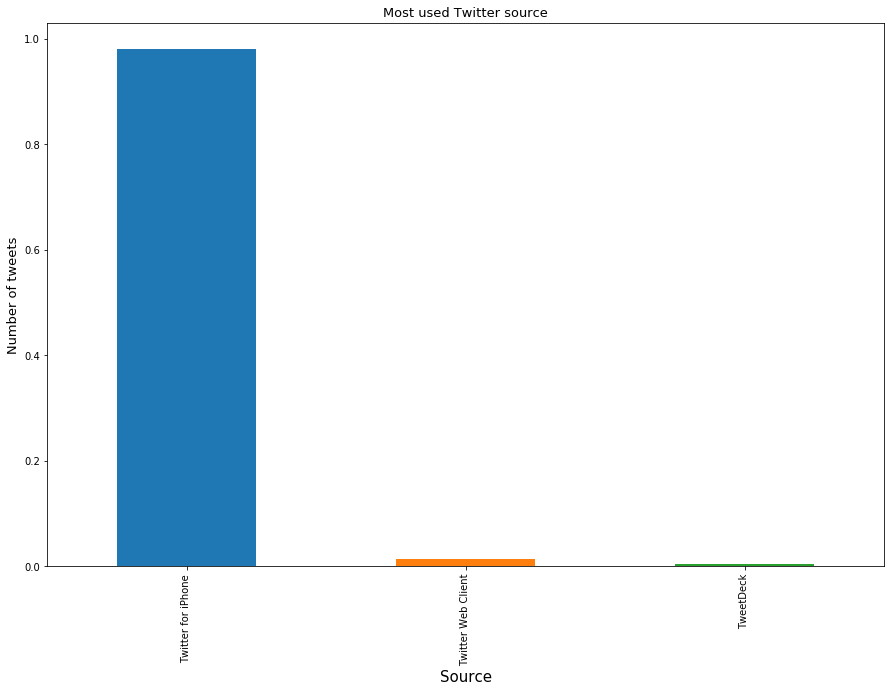

In [65]:
source.plot(kind='bar', figsize=(15,10));
#Add labels
plt.title('Most used Twitter source', color = 'black', fontsize = '13')
plt.xlabel('Source', color = 'black', fontsize = '15')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

> Insight 2: What is the Most Common Name

In [66]:
dog_names = twitter_archive_master.name.value_counts()

In [67]:
popular_dog_names = twitter_archive_master.name.value_counts()[0:10]

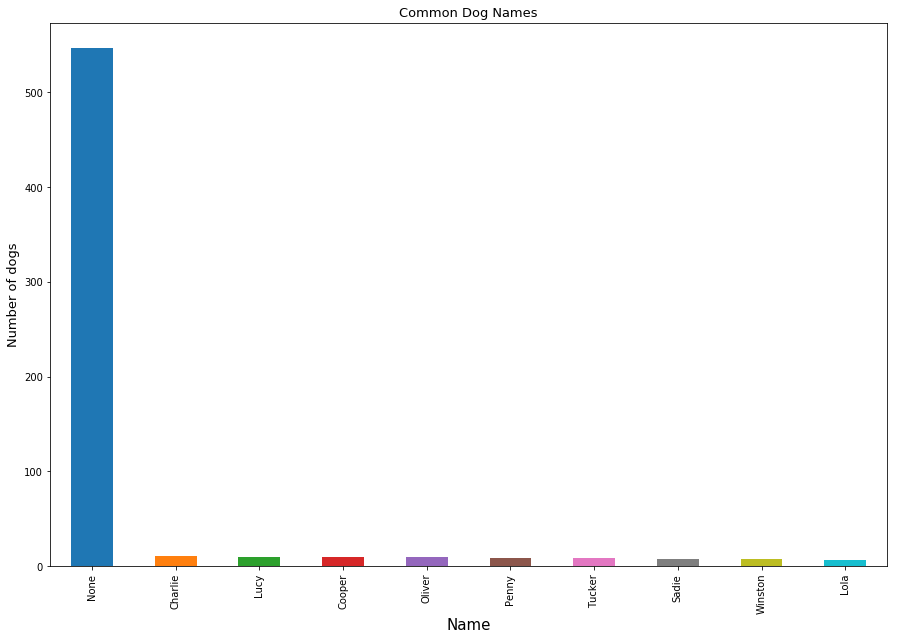

In [68]:
popular_dog_names.plot(kind='bar', figsize=(15,10))
plt.title('Common Dog Names', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '15')
plt.ylabel('Number of dogs', color = 'black', fontsize = '13');

> Insight 3: Correlation Between Favorite and Retweet

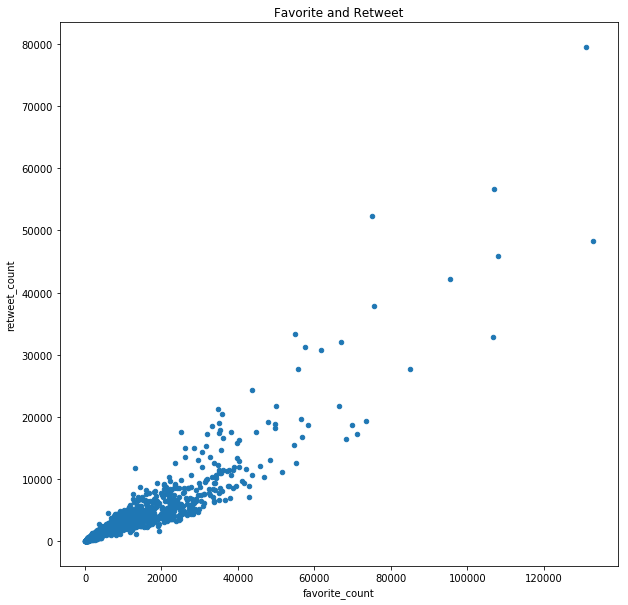

In [69]:
# Correlation between profit and budget
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter',
                            title = 'Favorite and Retweet', figsize = (10,10));

In [70]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.91130959733454553